In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(["science", "ieee"])


import torch

torch.manual_seed(88)

from torchvision.datasets import CIFAR10
from generalization.randomization import RandomizedDataset
from matplotlib import pyplot as plt
from generalization.randomization.utils import image_grid, image_grid_comparision

# Exploration of Corrupted Data

The experiments in this paper are based mainly on exploring the effect of different types of corruption on the performance of the models. The following sections describe the different types of corruption used in the experiments.

| **Experiment Name** | **Description** |
| --------------- | ----------- |
| **True Labels**                | Original dataset without modification |
| **Partially Corrupted Labels** | Independently with probability p, the label of each image is corrupted as a uniform random class |
| **Random Labels**              | All the labels are replaced with random ones |
| **Shuffled Pixels**            | A random permutation of the pixels is chosen and then the same permutation is applied to all the images in both training and test set |
| **Random Pixels**              | A different random permutation is applied to each image independently |
| **Gaussian**                   | A Gaussian distribution (with matching mean and variance to the original image dataset) is used to generate random pixels for each image |


In [3]:
RandomizedDataset?

Init signature:
RandomizedDataset(
    data=None,
    targets=None,
    dataset=None,
    corruption_name=None,
    corruption_prob=0.0,
    apply_corruption=False,
    return_corruption=False,
    train=True,
    transform=None,
    target_transform=None,
    **kwargs,
)
Docstring:     
Dataset that applies Randomization Attacks as shown in https://arxiv.org/abs/1611.03530.

Args:
    dataset (torch.utils.data.Dataset): Dataset to be randomized
    data (torch.Tensor): Data tensor
    targets (torch.Tensor): Target tensor
    corruption_name (str): Name of the corruption to be applied
    corruption_probtarget_idx (float): Probability of corruption
    apply_corruption (bool): If True, the corruption is applied to the returned image
    return_corruption (bool): If True, the corruption is returned along with the image
    train (bool): If True, the dataset is used for training
    transform (callable, optional): A function/transform that takes in an PIL image and returns a transformed

## 1. True Data

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: None
CIFAR10 Shape: torch.Size([3, 32, 32])


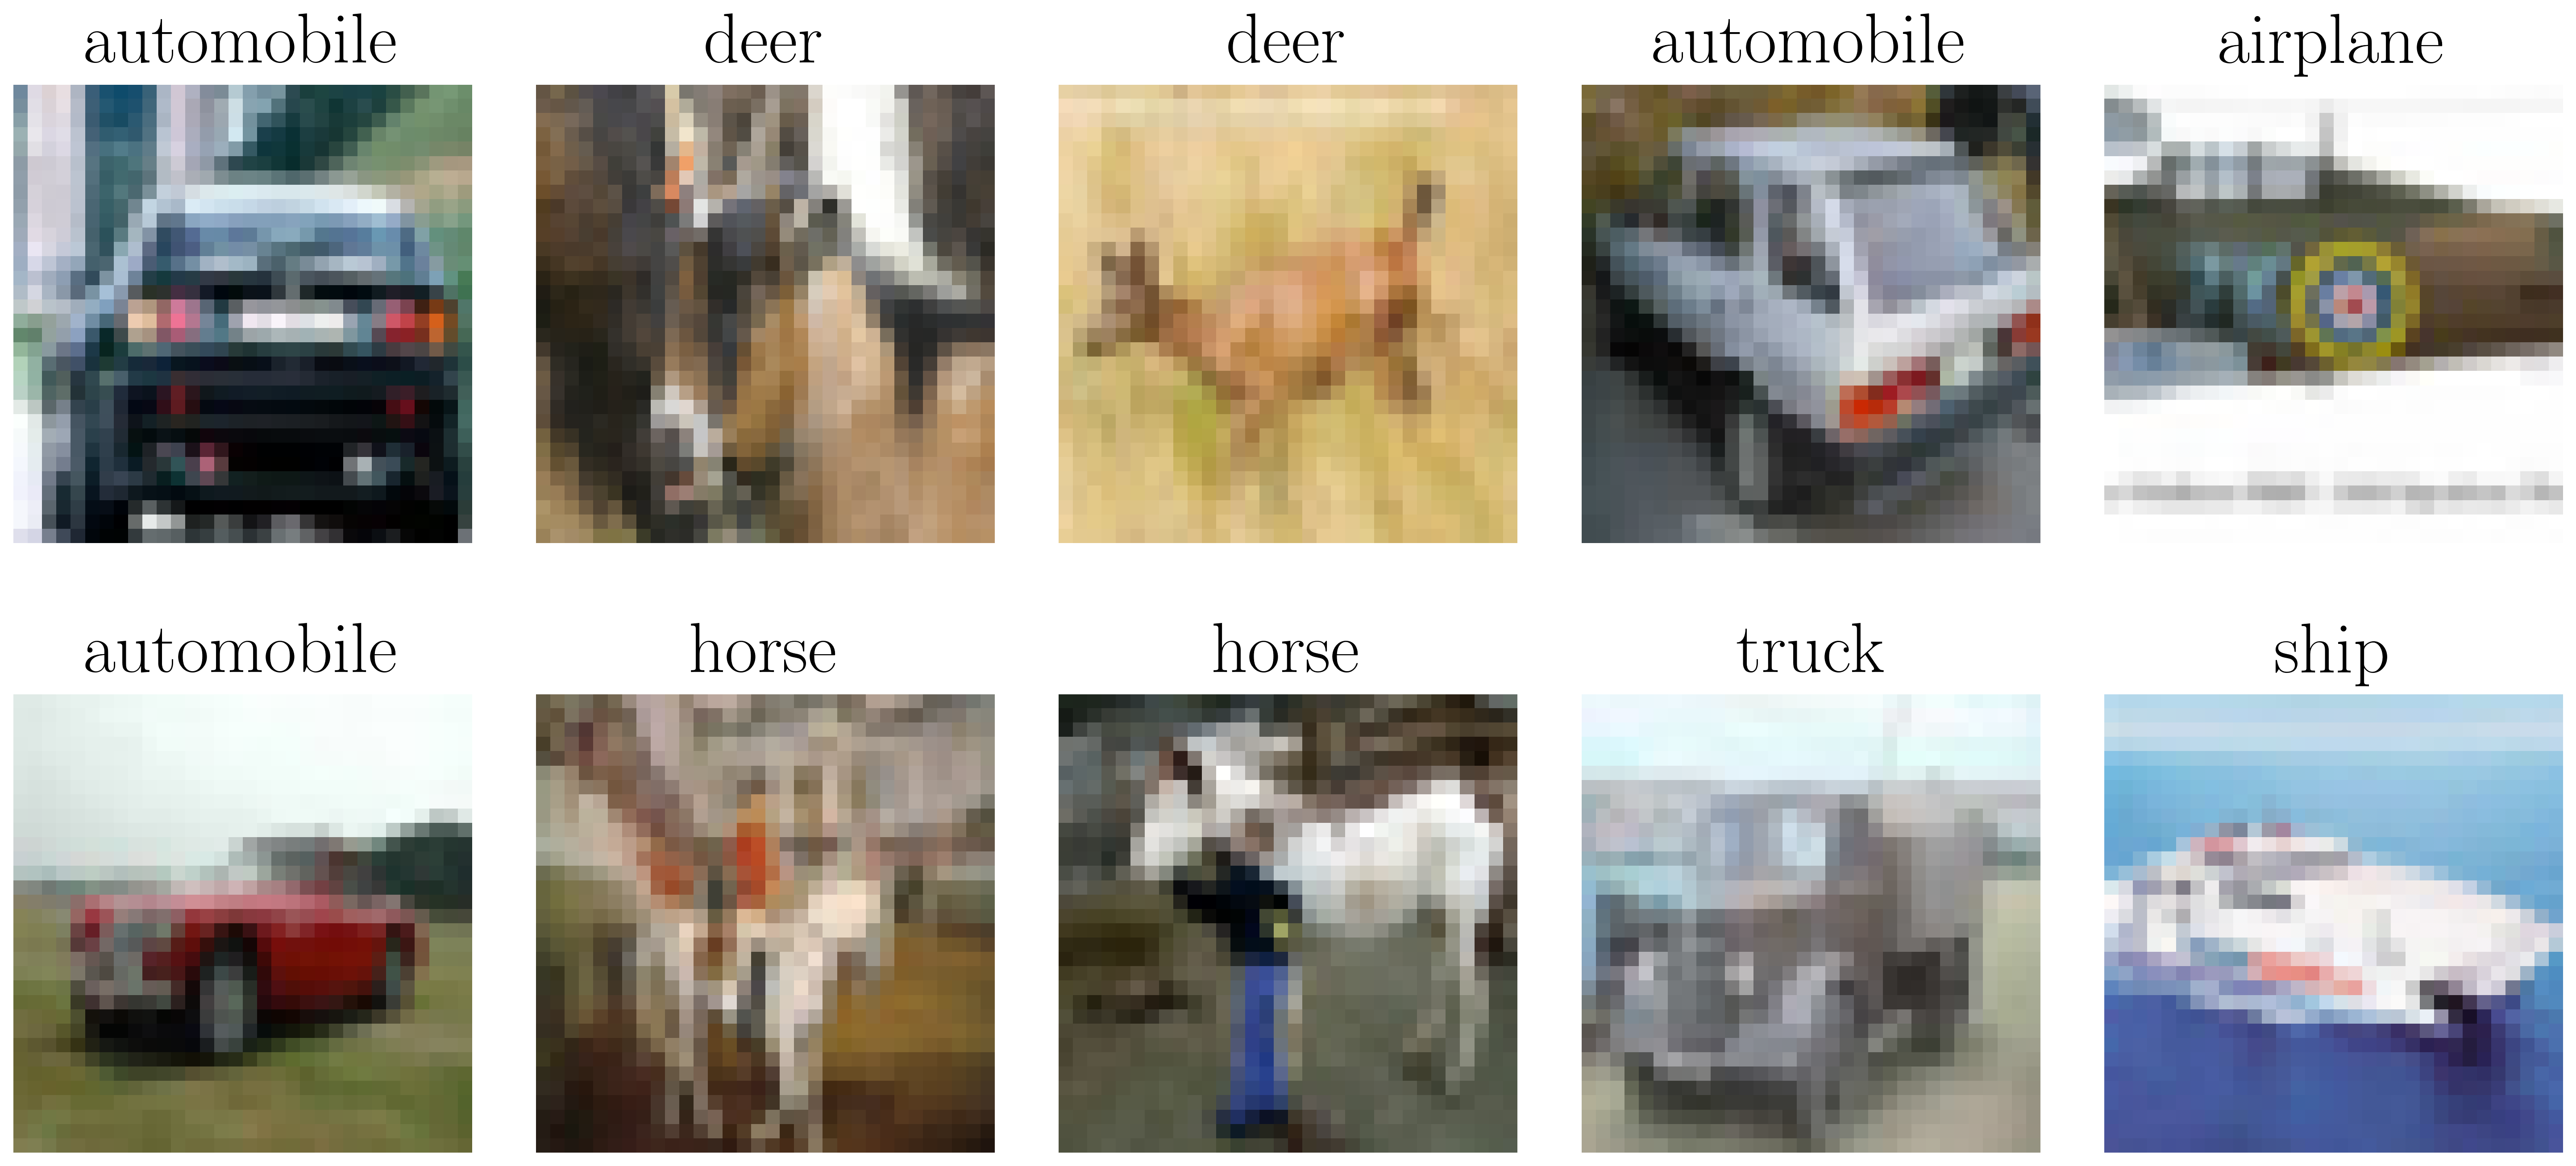

In [4]:
import numpy as np

cifar = RandomizedDataset(dataset=CIFAR10(root="./data/cifar10", download=True))
random_idxs = np.random.choice(len(cifar), 10)

print(repr(cifar))

image_grid(cifar, random_idxs, save_fname="./images/cifar10")
print("CIFAR10 Shape:", cifar[0][0].size())

## 2. Partially Corrupted Labels

Files already downloaded and verified


100%|██████████| 50000/50000 [00:06<00:00, 7951.39it/s]


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: partial_labels


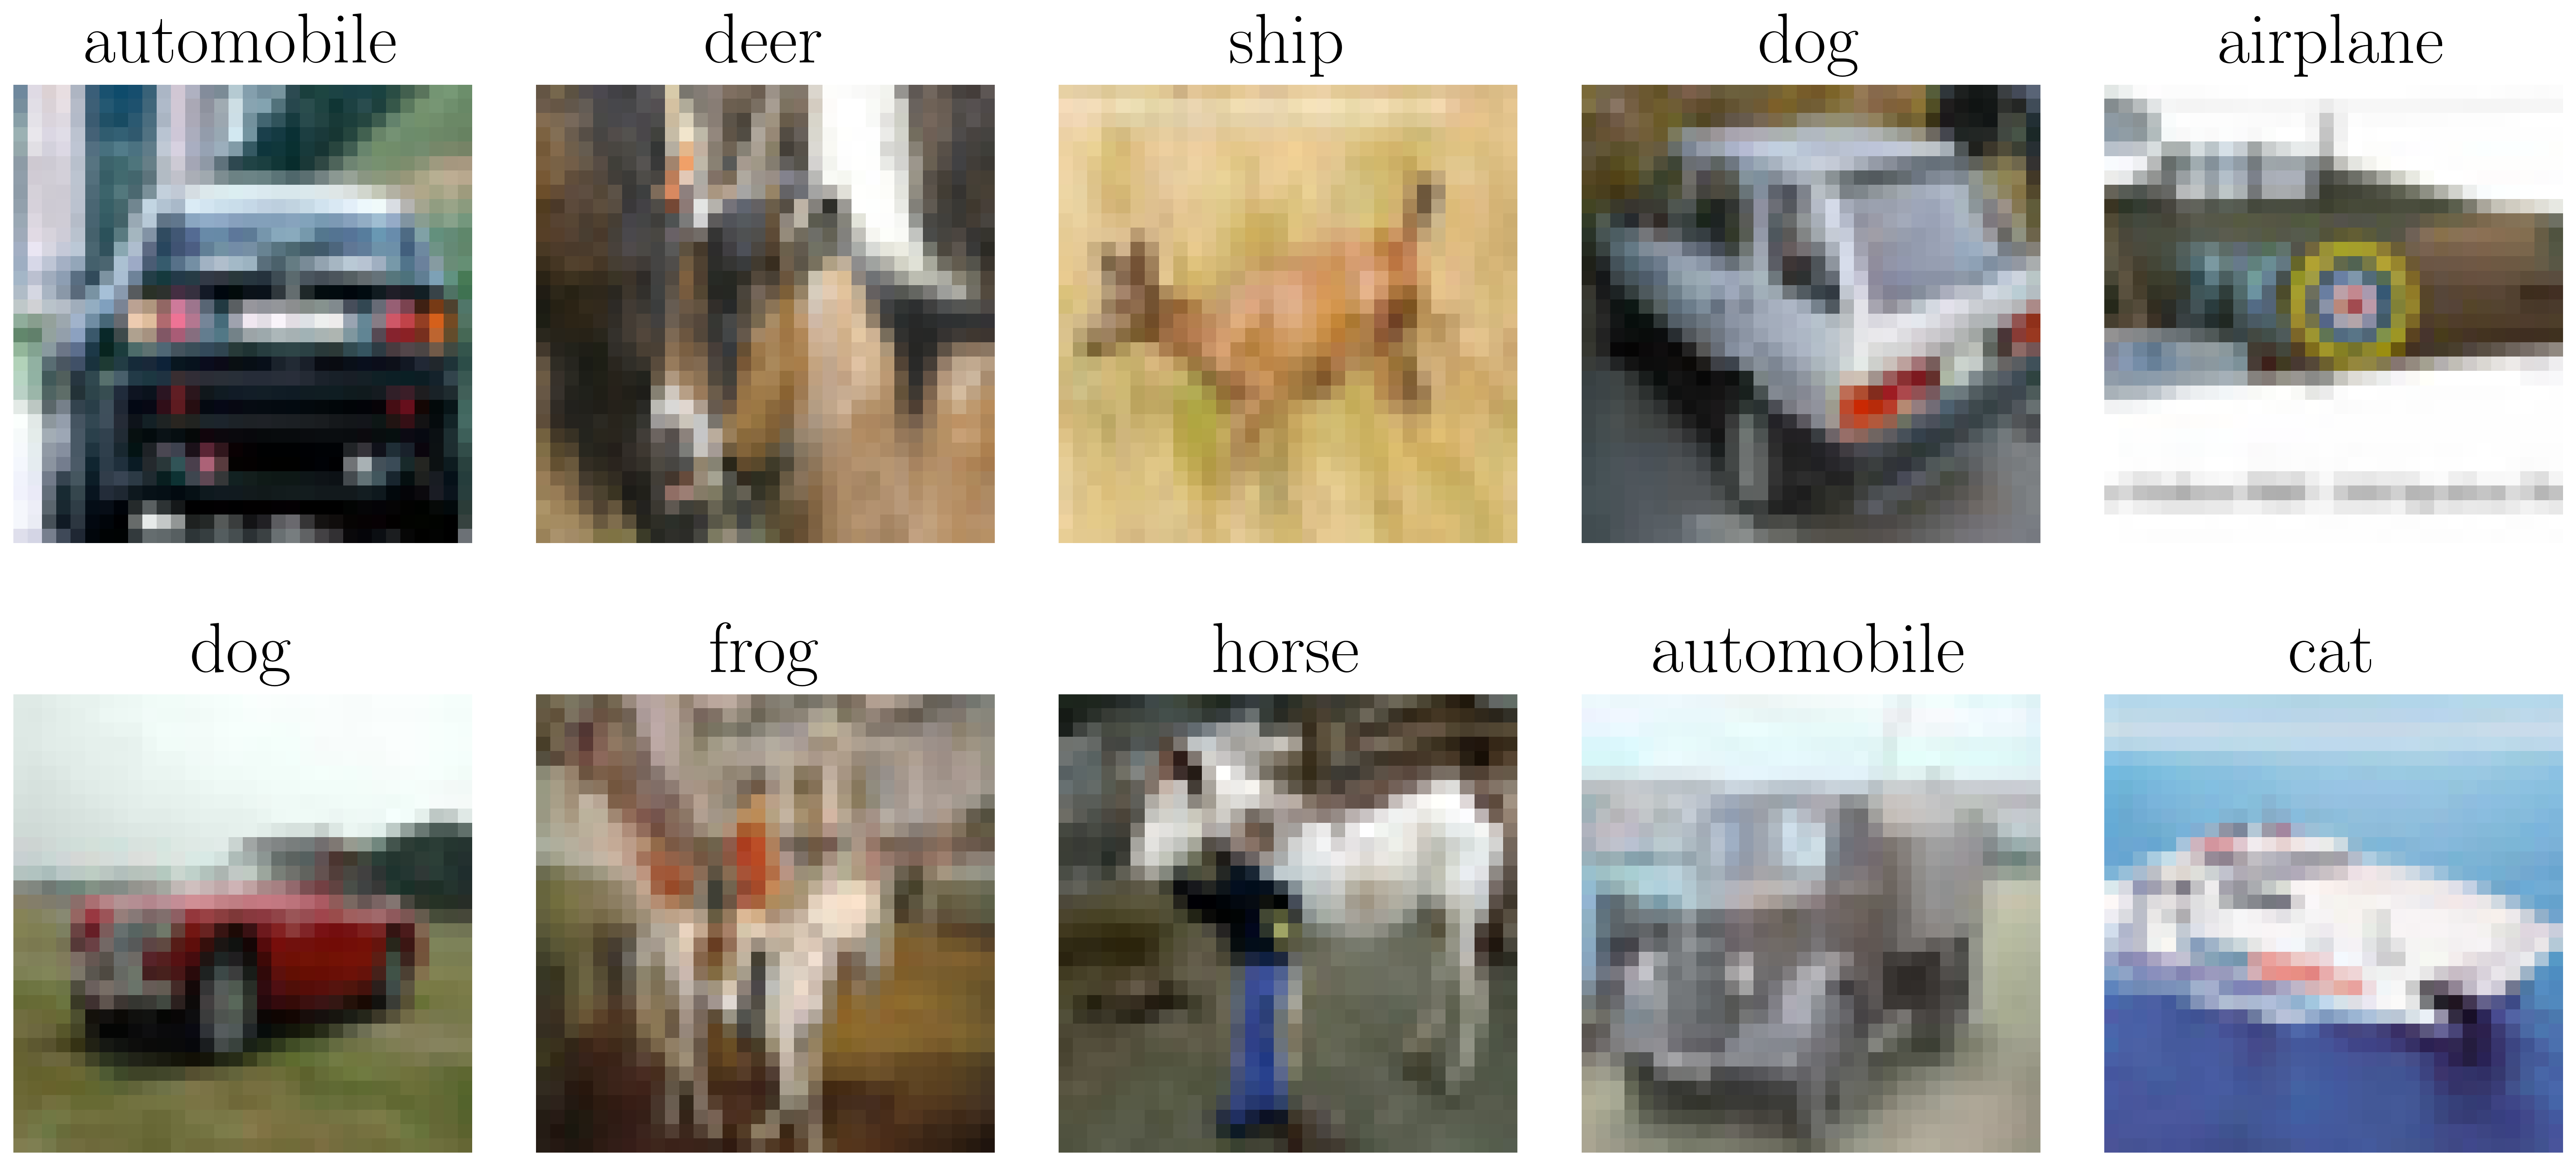

In [5]:
cifar_partial_labels = RandomizedDataset(
    dataset=CIFAR10(root="./data/cifar10", download=True),
    corruption_name="partial_labels",
    corruption_prob=0.5,
    apply_corruption=True,
)

print(repr(cifar_partial_labels))
image_grid(cifar_partial_labels, random_idxs, save_fname="./images/cifar10-partial-labels")

## 3. Random Labels

Files already downloaded and verified


100%|██████████| 50000/50000 [00:06<00:00, 7803.63it/s]


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: random_labels


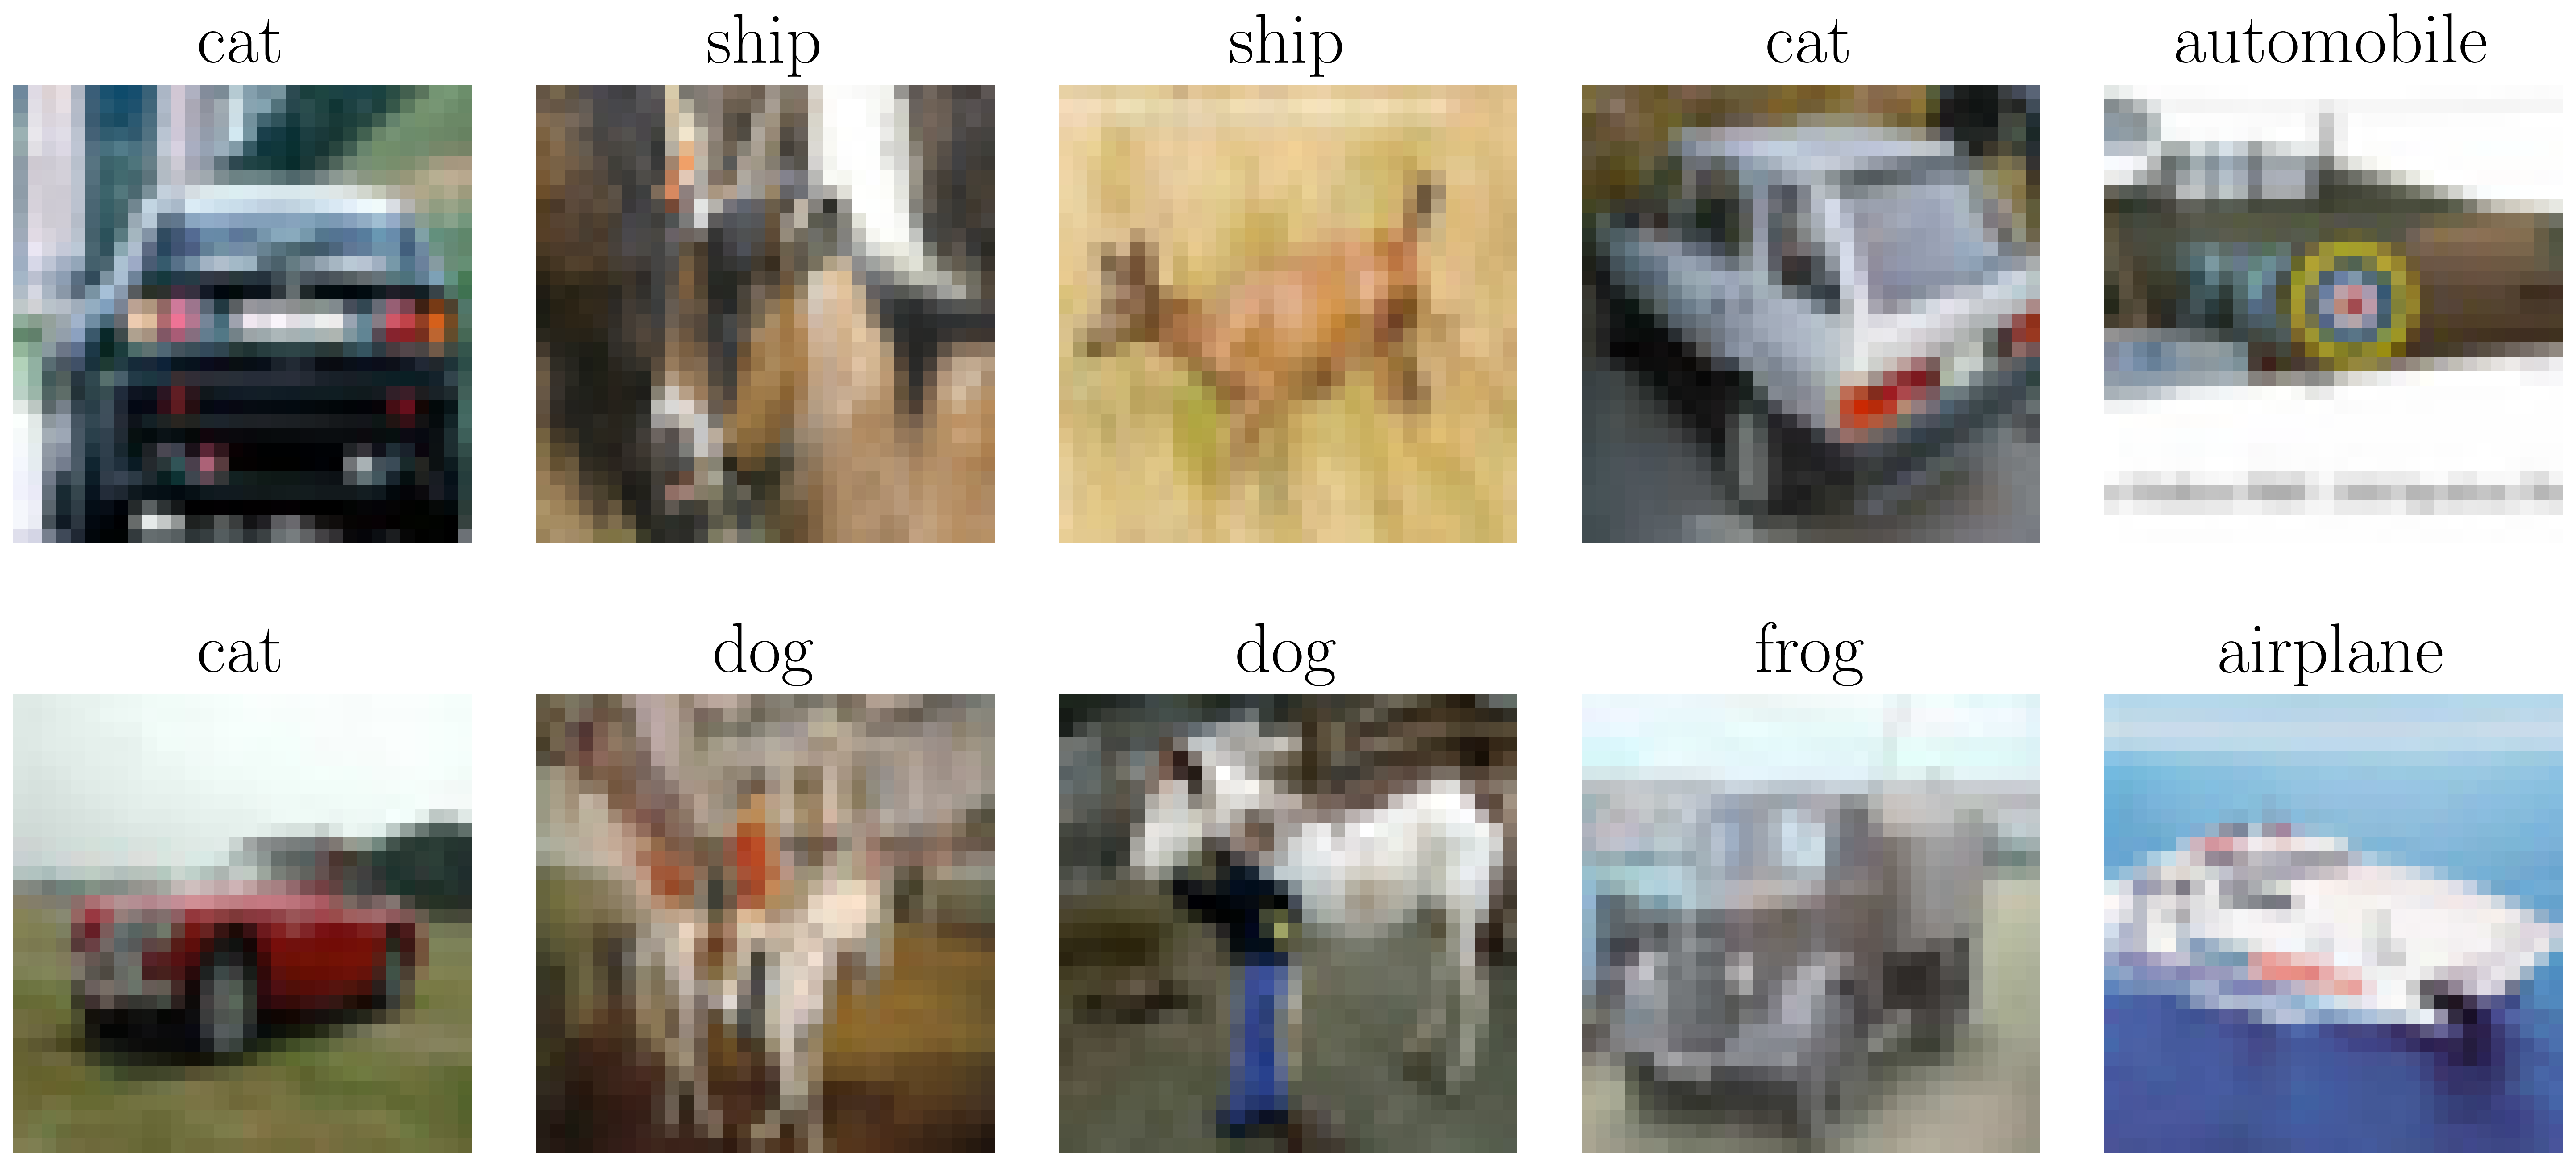

In [6]:
cifar_random_labels = RandomizedDataset(
    dataset=CIFAR10(root="./data/cifar10", download=True),
    corruption_name="random_labels",
    apply_corruption=True,
)
print(repr(cifar_random_labels))
image_grid(cifar_random_labels, random_idxs, save_fname="./images/cifar10-random-labels")

## 4. Shuffled Pixels


Files already downloaded and verified


100%|██████████| 50000/50000 [00:06<00:00, 7572.52it/s]


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: shuffled_pixels
tensor([947, 886, 957,  ...,  54, 110, 429]) torch.Size([1024])
tensor([947, 886, 957,  ...,  54, 110, 429]) torch.Size([1024])
tensor([947, 886, 957,  ...,  54, 110, 429]) torch.Size([1024])
tensor([947, 886, 957,  ...,  54, 110, 429]) torch.Size([1024])
tensor([947, 886, 957,  ...,  54, 110, 429]) torch.Size([1024])


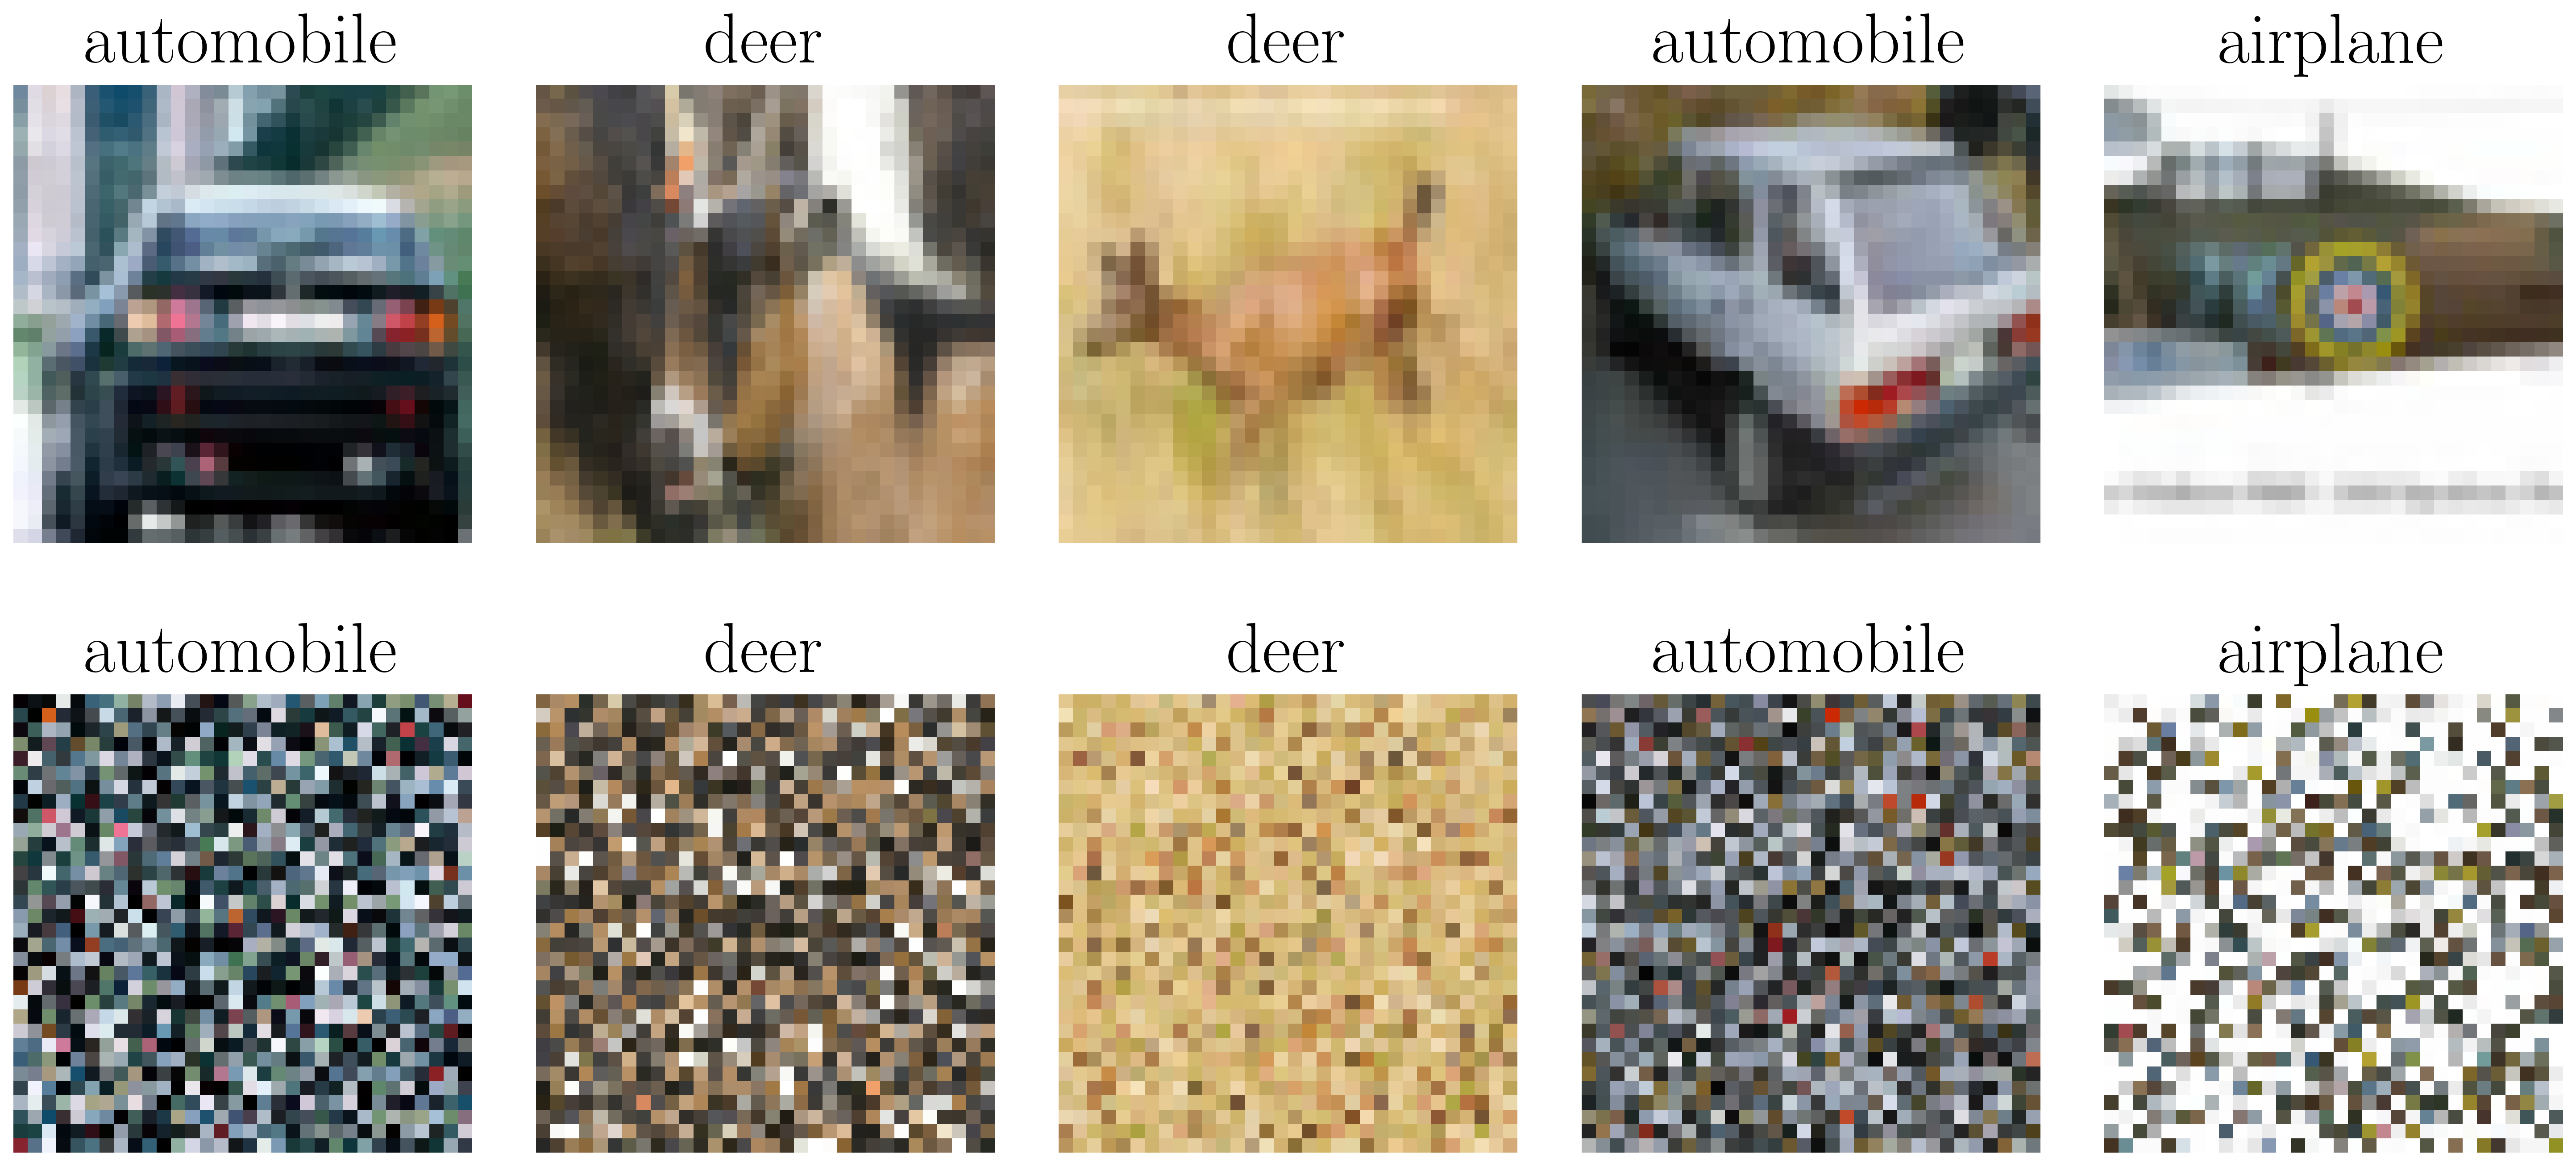

In [7]:
cifar_shuffled_pixels = RandomizedDataset(
    dataset=CIFAR10(root="./data/cifar10", download=True),
    corruption_name="shuffled_pixels",
    corruption_prob=0.9,
    apply_corruption=False,
    return_corruption=True,
)

print(repr(cifar_shuffled_pixels))

image_grid_comparision(cifar_shuffled_pixels, random_idxs, save_fname="./images/cifar10-shuffled-pixels")

## 5. Random Pixels

Files already downloaded and verified


100%|██████████| 50000/50000 [00:07<00:00, 6758.03it/s]


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: random_pixels
tensor([115, 694, 410,  ..., 585, 195, 826]) torch.Size([1024])
tensor([472, 786, 912,  ..., 965, 976, 209]) torch.Size([1024])
tensor([1008,  662, 1004,  ...,  556,  886,  226]) torch.Size([1024])
tensor([277, 795, 569,  ..., 936, 783, 303]) torch.Size([1024])
tensor([119, 274, 372,  ..., 961, 521, 966]) torch.Size([1024])


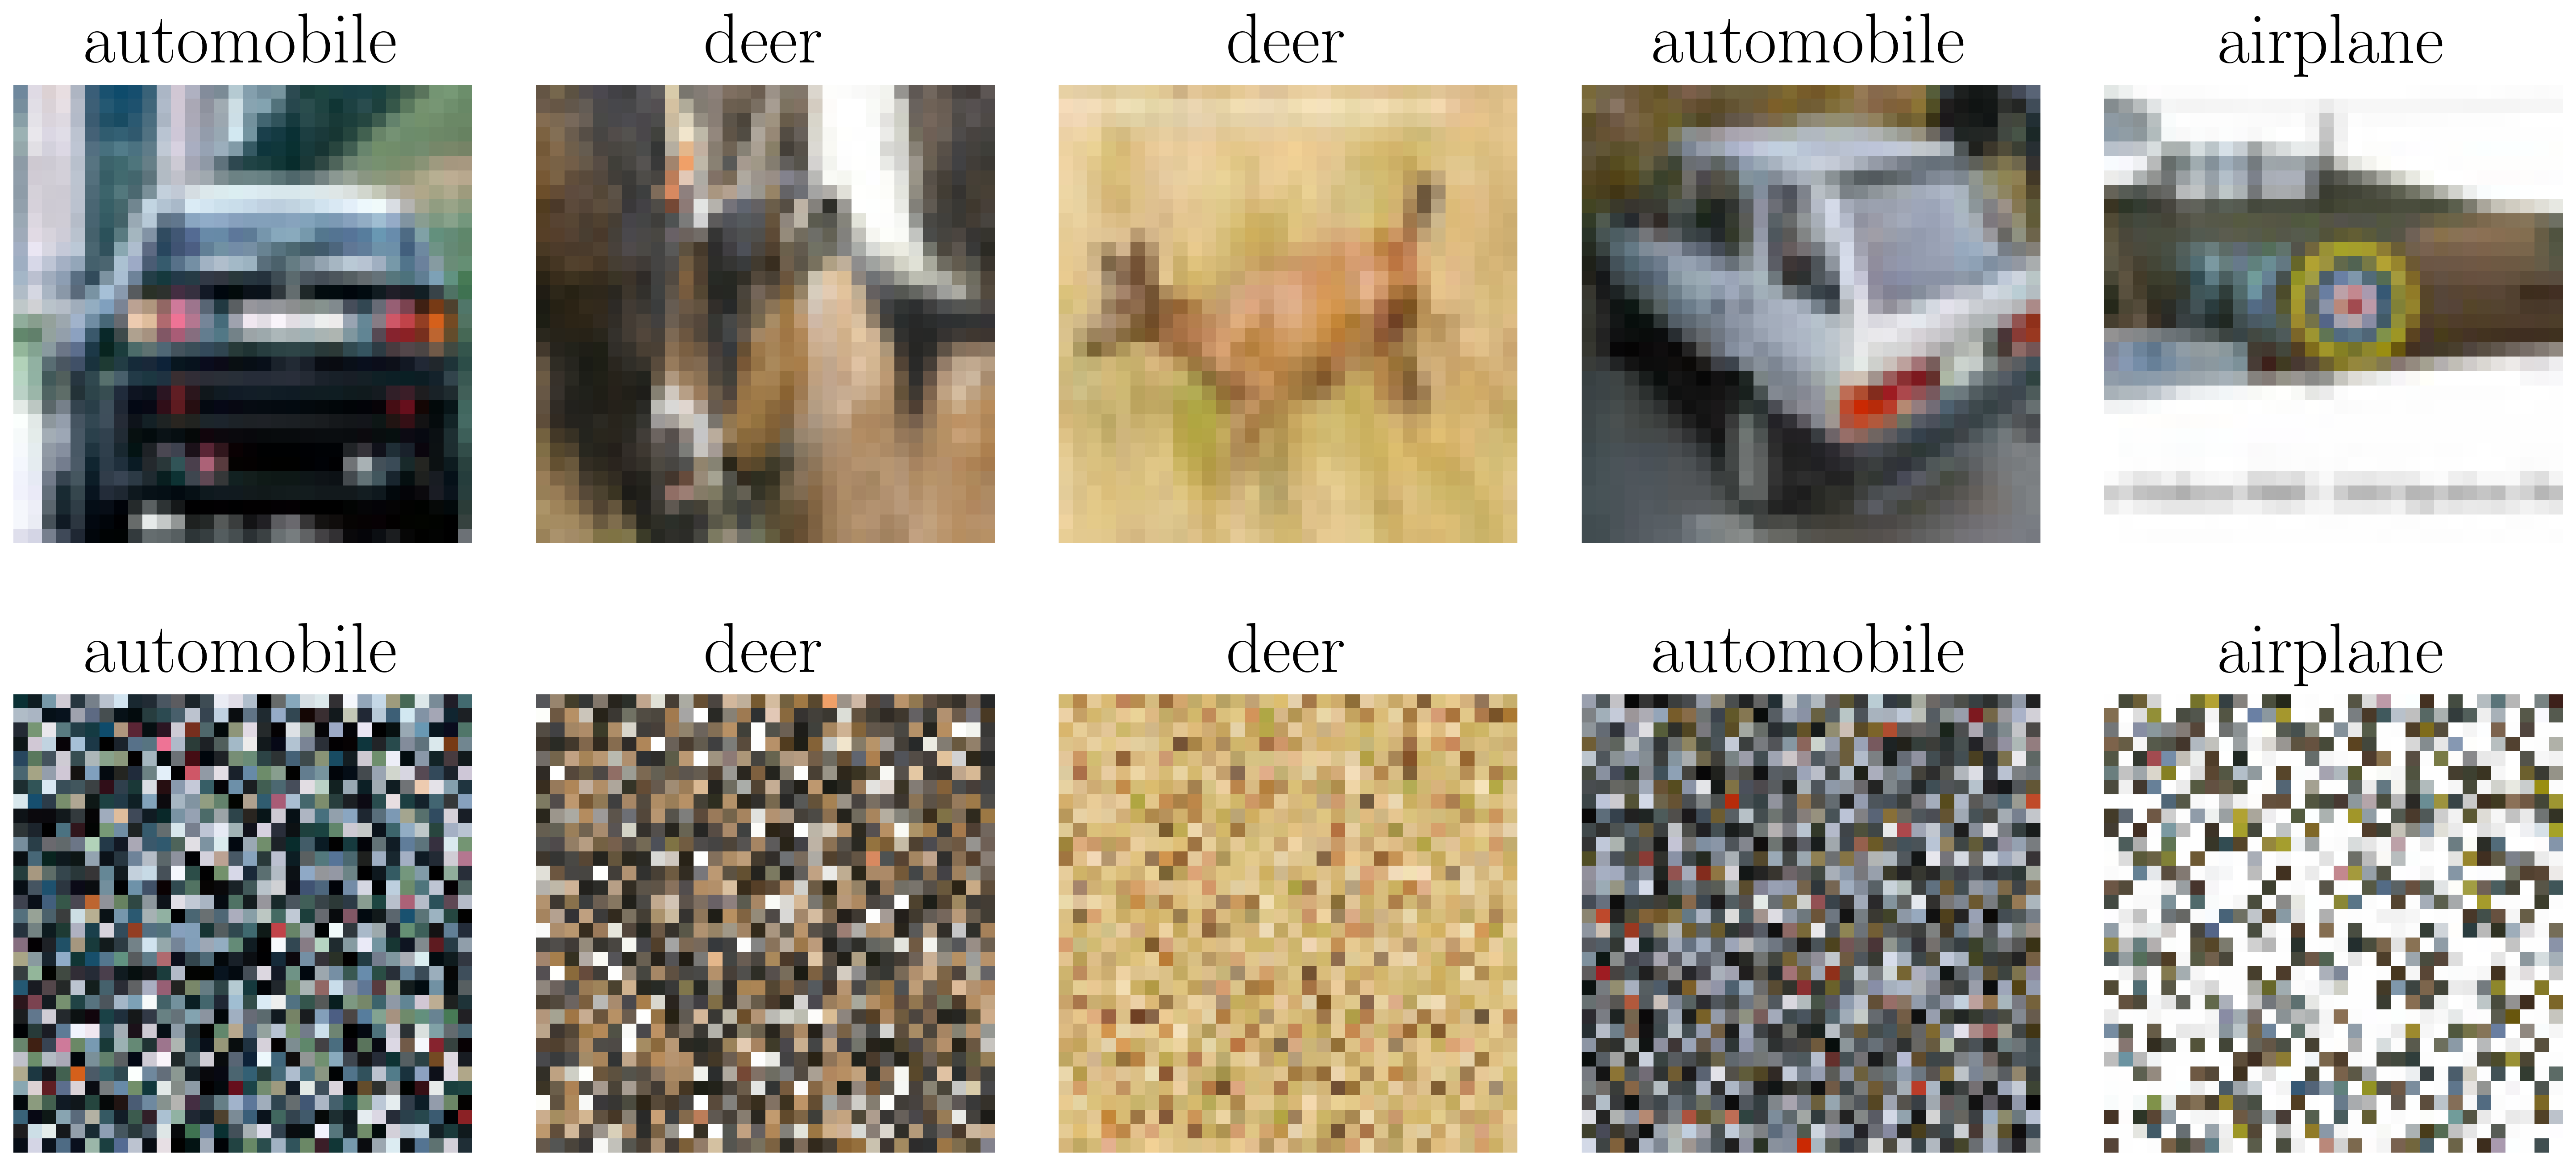

In [8]:
cifar_random_labels = RandomizedDataset(
    dataset=CIFAR10(root="./data/cifar10", download=True),
    corruption_name="random_pixels",
    apply_corruption=False,
    return_corruption=True,
)

print(repr(cifar_random_labels))
image_grid_comparision(cifar_random_labels, random_idxs, save_fname="./images/cifar10-random-pixels")

## 6. Gaussian Pixels

Files already downloaded and verified


100%|██████████| 50000/50000 [00:08<00:00, 5813.73it/s]


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data/cifar10
    Split: Train, Corruption: gaussian_pixels


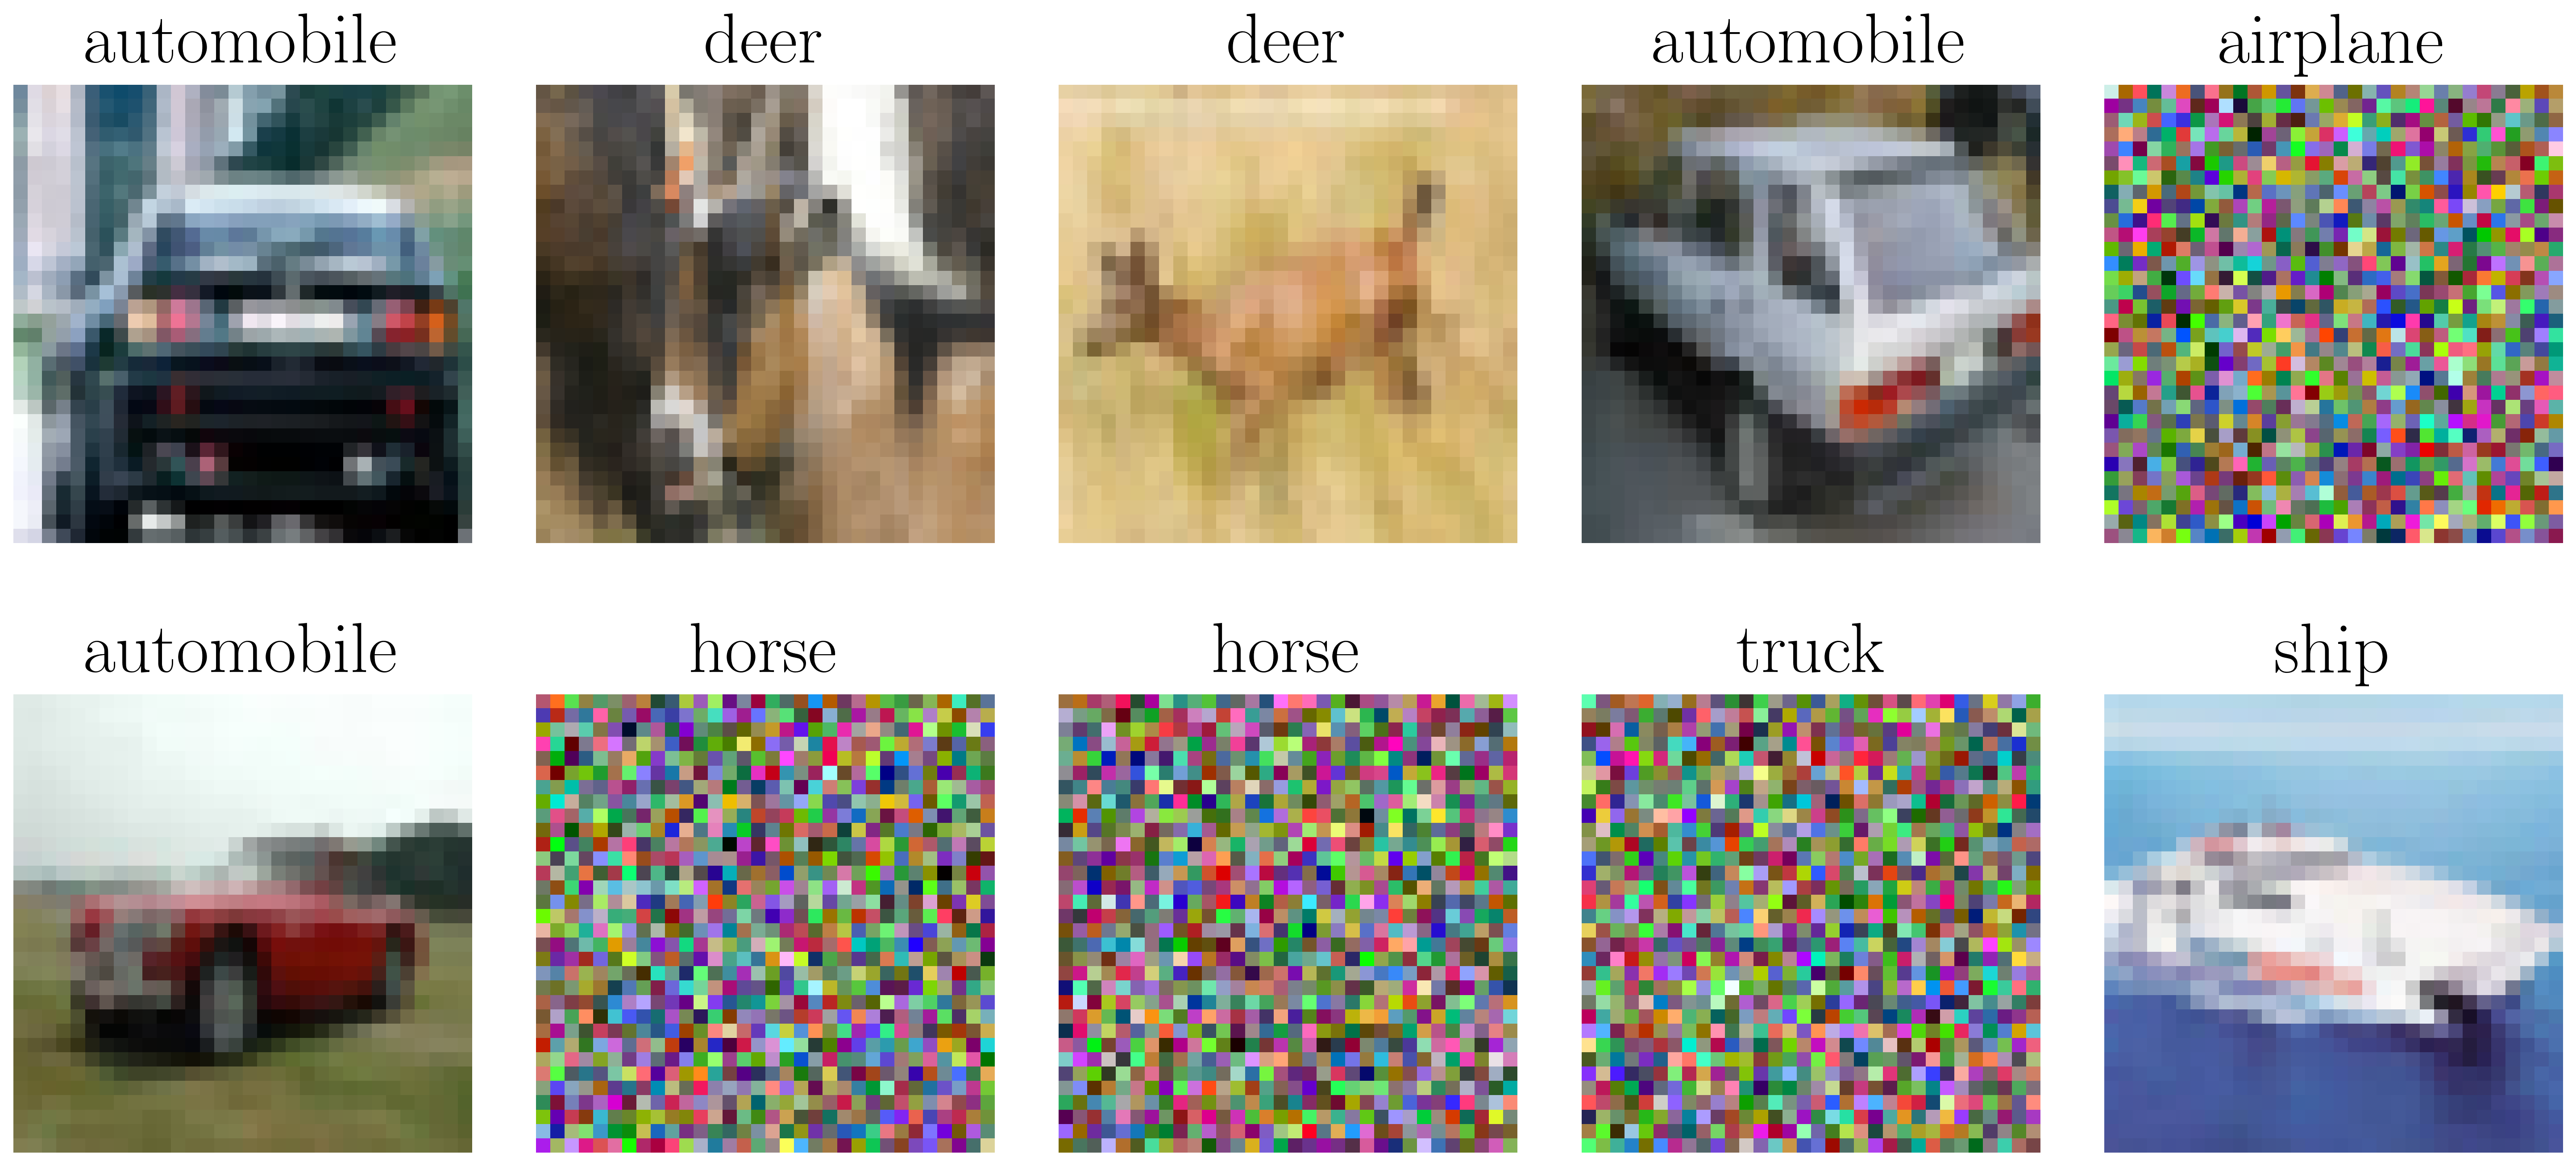

In [9]:
cifar_gaussian = RandomizedDataset(
    dataset=CIFAR10(root="./data/cifar10", download=True),
    corruption_name="gaussian_pixels",
    corruption_prob=0.60,
    apply_corruption=True,
    use_cifar=True,
)

print(repr(cifar_gaussian))
image_grid(cifar_gaussian, random_idxs, save_fname="./images/cifar10-gaussian-pixels")